## Mall_Customer data Segmentation using K-Means

1. Importing necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

2. Data Reading

In [9]:
df =pd.read_csv("C:\\Users\\USER\\Desktop\\ML_projects\\ML_trainee\\Day-11\\Assignment\\Mall_Customers.csv")
# Select relevant features
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


3. Elbow method to find Optimal k Value

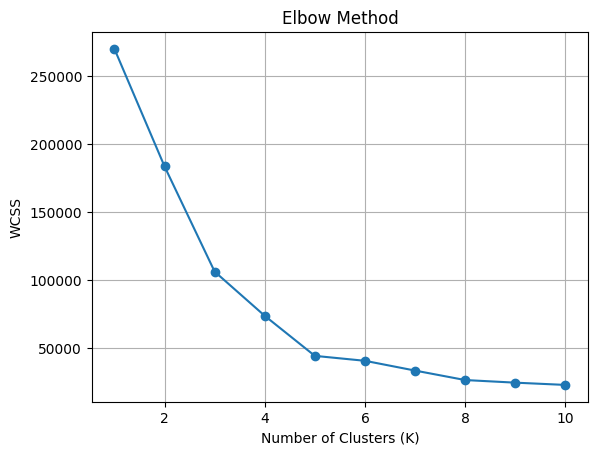

In [10]:
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


4.Applying K-Means

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


5. Visualizing Clusters and Centroids

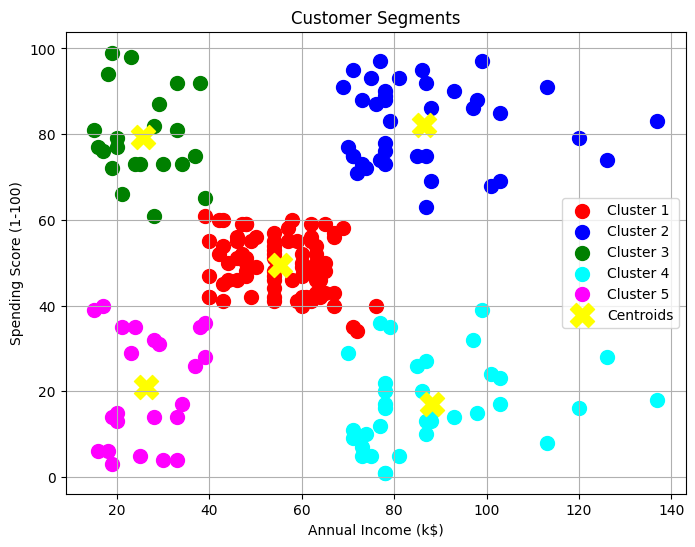

In [12]:
# Plot clusters
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X[y_kmeans == i]["Annual Income (k$)"], 
                X[y_kmeans == i]["Spending Score (1-100)"], 
                s=100, c=colors[i], label=f'Cluster {i+1}')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids', marker='X')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


6. Summary report

| Cluster     | Characteristics            | Description                                              |
| ----------- | -------------------------- | -------------------------------------------------------- |
| 1 (Red)     | Low Income, Low Spending   | **Frugal** customers who spend cautiously                |
| 2 (Blue)    | Low Income, High Spending  | **Careless** customers with low income but high spending |
| 3 (Green)   | High Income, Low Spending  | **Careful** wealthy but minimal spenders                 |
| 4 (Cyan)    | High Income, High Spending | **Target Customers** – wealthy and high spenders         |
| 5 (Magenta) | Average Income & Spending  | **Typical** mid-level customers                          |
